# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

#### Collaborators: Shivangi, Sarah Bonna

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [2]:
def num_nans(df):
    return df.isna().sum()

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [3]:
def drop_na(df):
    return df.dropna(thresh=df.shape[0]-200,how='all',axis=1)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [4]:
def to_numerical(df):
    return df['Sex'].map(dict(zip(['male','female'],[0,1])))

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
def extract_names(df):
    name = df['Name']
    split_space = name.str.split(' ', expand=True)
    out=df['Name'].str.split(', ',expand=True)
    name_wo_last_name=out[1]
    out[2]=out[0]
    out[0]=split_space[2]
    out[1]=split_space[3]
    out[3]=name_wo_last_name.str.split(' ',1).str[0]
    return out

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr.


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [6]:
def replace_with_mean(df):
    return df["Age"].fillna(df["Age"].mean())

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr.


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

<AxesSubplot:xlabel='Survived'>

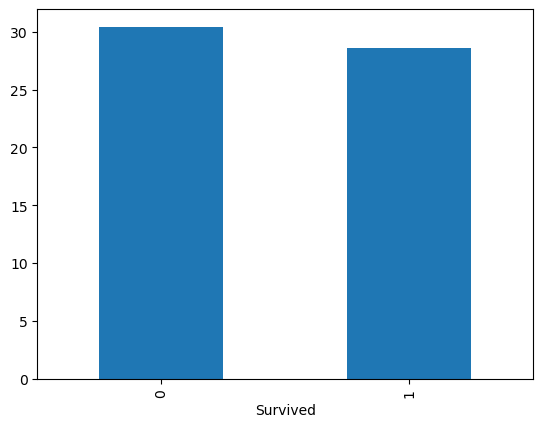

In [7]:
df.groupby("Survived").Age.mean().plot(kind='bar')

-> The average age people who survived is marginally lesser than the people who couldn't

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

<AxesSubplot:xlabel='Sex'>

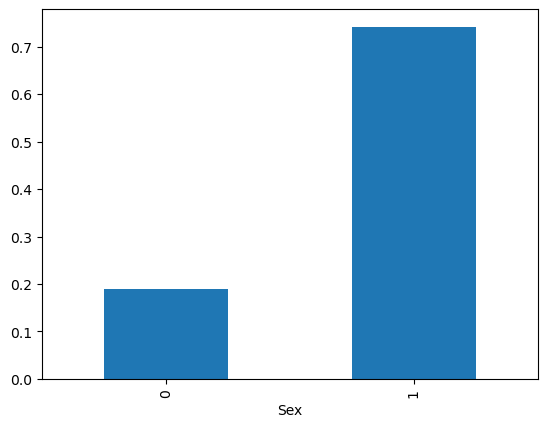

In [8]:
df.groupby('Sex').Survived.mean().plot(kind='bar')

-> The survival rate of people who identified as female is significantly greater than that of male probably because people who identified as female were given preference to excape the ship first

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

<AxesSubplot:xlabel='Title'>

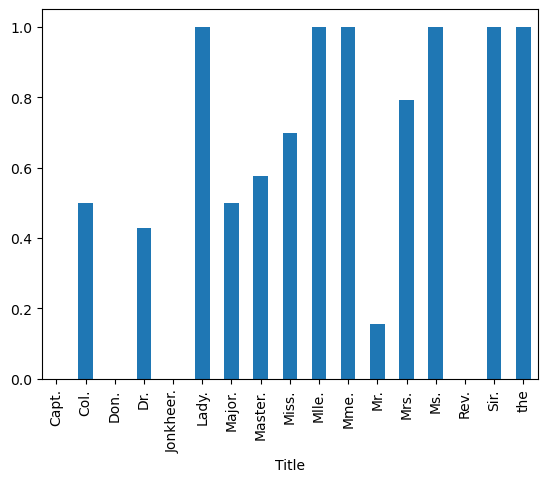

In [9]:
df.groupby('Title').Survived.mean().plot(kind='bar')

-> People with title Lady, Mlle, Mme, Sir, Ms, etc have a high survival rate as they were probably at the top portion of the ship assuming they held high positions in the society. On the other hand, people with titles Capt, Don, Rev, Col,Dr, etc have zero to low survival rates as they were probably held back in the ship helping the guests/others escape.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:xlabel='Survived'>

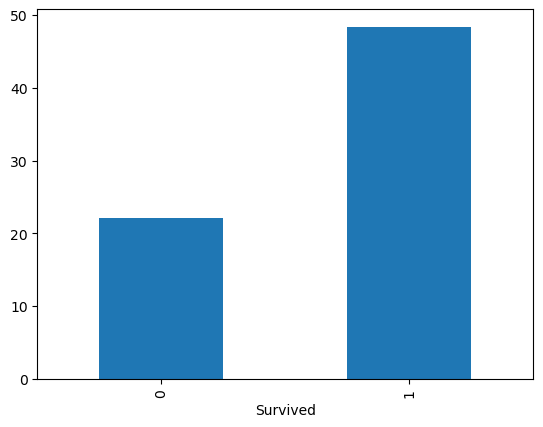

In [10]:
df.groupby("Survived").Fare.mean().plot(kind='bar')

-> The average fare of people who survived is higher indicating that people who were in the higher valued tickets had better survival rate

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

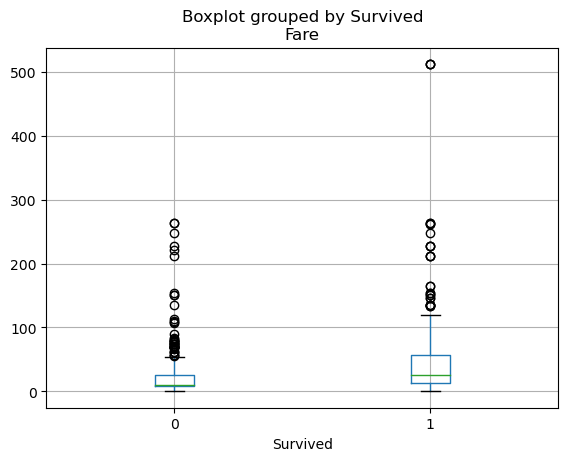

In [11]:
df.boxplot(column='Fare',by='Survived')

-> People who were in the lower fare tickets had lesser survival rate than the people who were in higher fare tickets

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [12]:
# your code here
def calculate_fare(df):
    return (df['Fare']-df['Fare'].mean())/df['Fare'].std()
df["Fare"]=calculate_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,None,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr.


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [13]:
import numpy as np
numerical_columns_df = df.select_dtypes([np.number])
numerical_columns_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,-0.502163
1,2,1,1,1,38.0,1,0,0.786404
2,3,1,3,1,26.0,0,0,-0.488580
3,4,1,1,1,35.0,1,0,0.420494
4,5,0,3,0,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar **pairs** of passengers using the euclidean distance and ignoring pairs that have distance zero - (15 points)

In [14]:
import sklearn.metrics as metrics
def euclidian_distance(data):
    return metrics.pairwise.euclidean_distances(data,data)

def get_passengers(passenger_pair):
    return (df.Name[passenger_pair[0] - 1], df.Name[passenger_pair[1] - 1])

def N_most_similar_pairs(df, N):
    data = numerical_columns_df.drop("PassengerId", axis=1).values
    distances = euclidian_distance(data)
    # to ignore 0 distance combinations, make diagonal (distance between same attributes) infinity
    # np.fill_diagonal(distances, np.inf) 
    # removing other 0s to infinity
    distances = np.tril(distances, k=-1)
    distances[distances==0]=np.inf 
    index_array = np.argpartition(distances.flatten(), N)[:N]
    # get indices of the pairs
    pairs = np.vstack(np.unravel_index(index_array, distances.shape)).T
    return pd.DataFrame(pairs).apply(get_passengers, axis=1).tolist()
    
print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar pairs of passengers are: [('Bostandyeff, Mr. Guentcho', 'Buss, Miss. Kate'), ('Palsson, Mrs. Nils (Alma Cornelia Berglund)', 'Vovk, Mr. Janko'), ('Silvey, Mrs. William Baird (Alice Munger)', 'Hunt, Mr. George Henry')]


# Exercise 2 (40 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/) and challenge your understanding of clustering and kmeans.

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. Hint: the centroid of the cluster has the same dimensions as the images in the dataset. - (10 points)

(1797, 64)


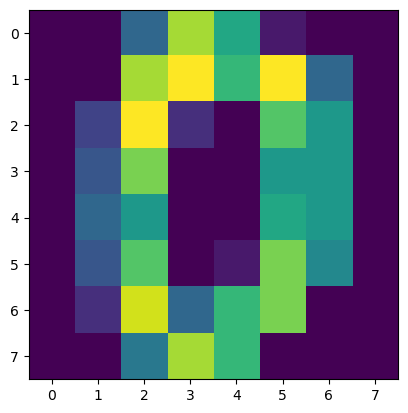

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


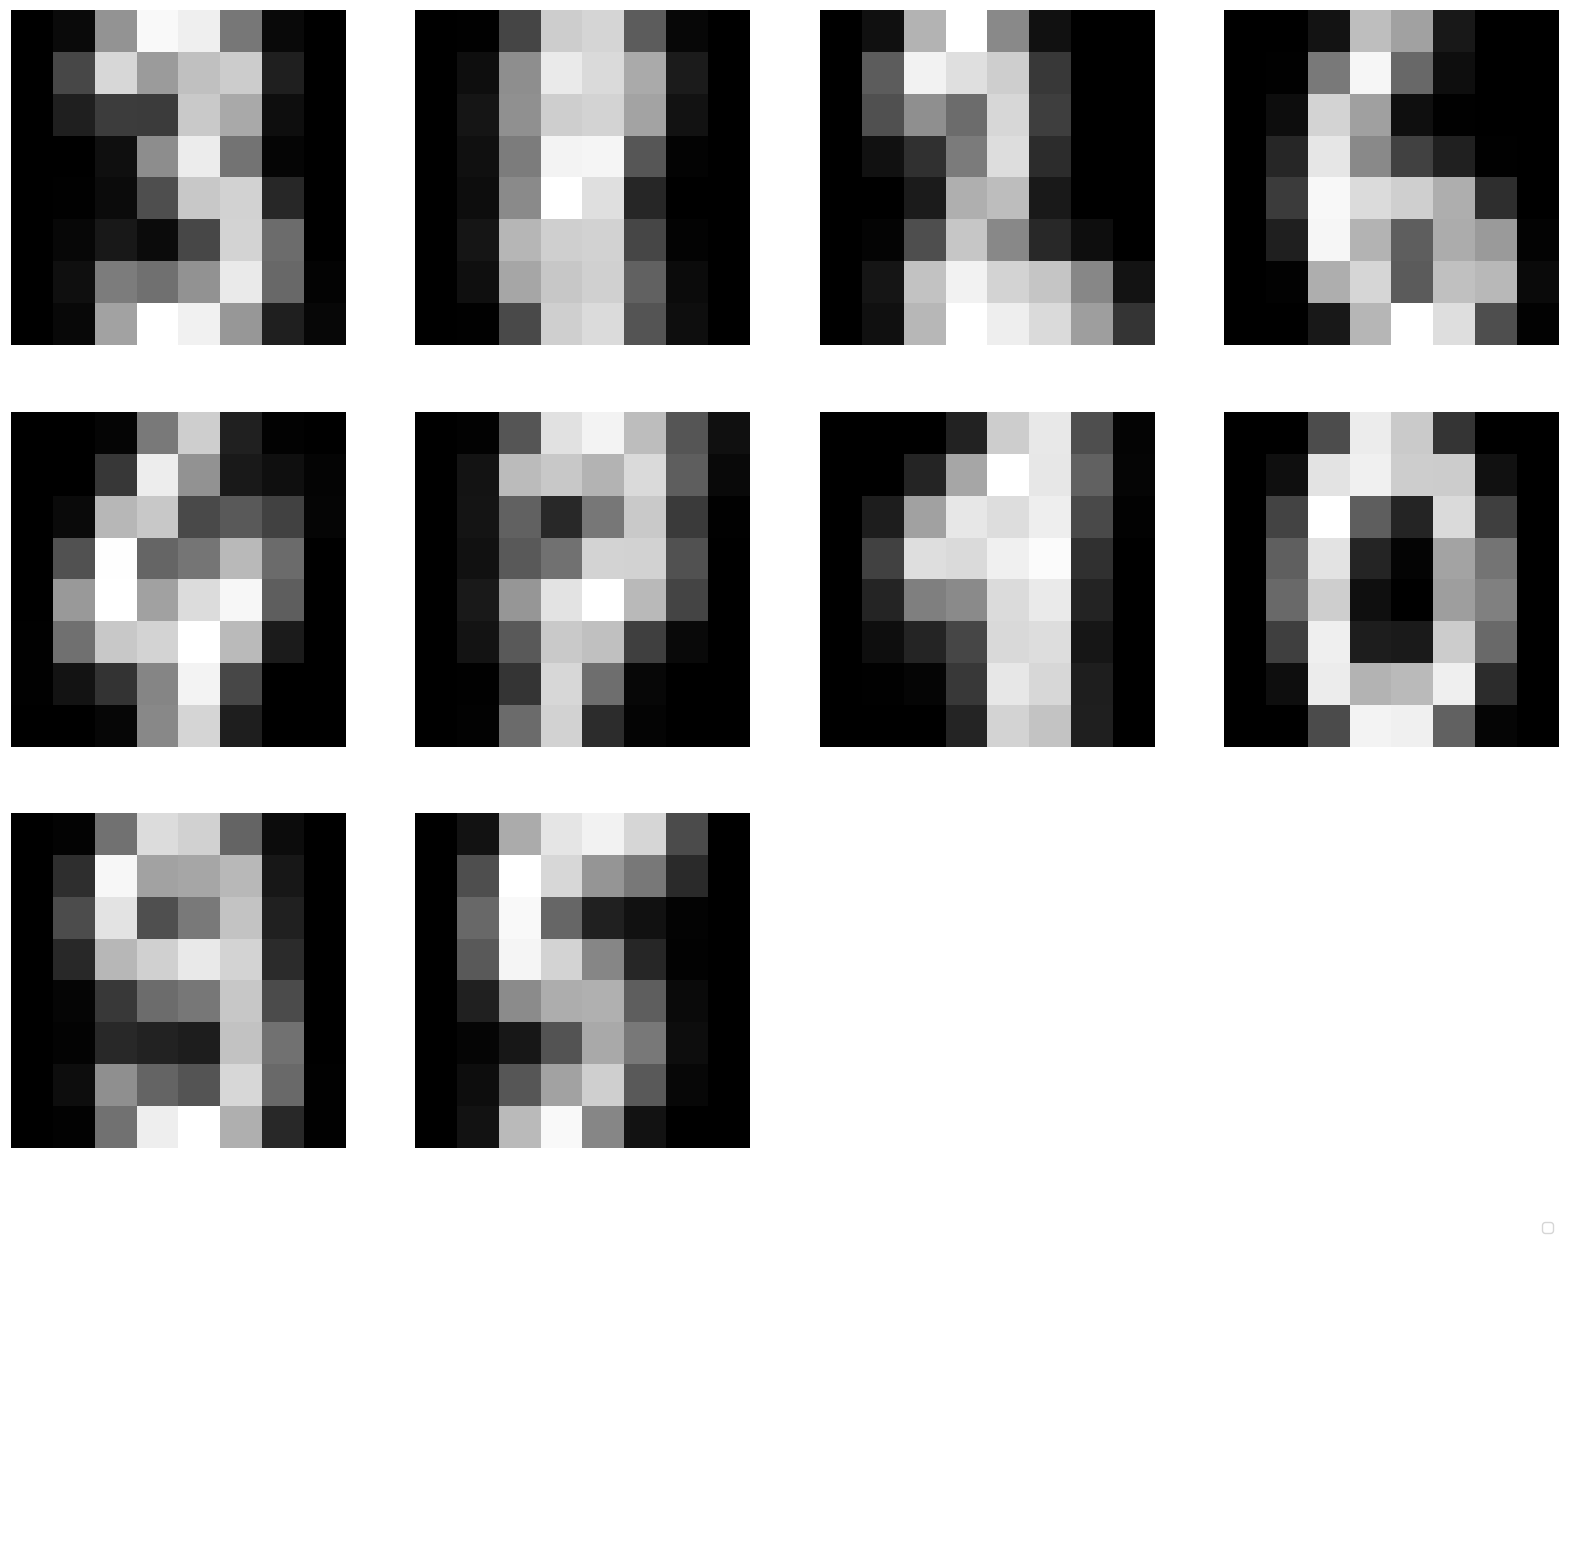

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np

def bench_k_means(labels, name, data):
    print("Silhouette: {0:0.3f}".format(metrics.silhouette_score(
        data, labels, metric='euclidean', sample_size=300)))

mnist = load_digits()
print(mnist.data.shape)

sample_digit = mnist.data[0].reshape(8, 8)
plt.imshow(sample_digit)
plt.show()
Y = mnist.target

kmeans_cluster = KMeans(init="random", n_clusters=10, n_init=10, random_state=0)
kmeans_cluster.fit(mnist.data)
  
centroids = kmeans_cluster.cluster_centers_
labels = kmeans_cluster.fit_predict(mnist.data)
  
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
    if i<10:
        ax.matshow(centroids[i].reshape(8, 8))
    ax.axis('off')
plt.legend()
plt.show()

b) Each of the images has a label corresponding to the digit that the image represents. These labels generate a clustering of the images where all images of digit 1 for example are in cluster labeled `1`. Compare the [silhouette scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the clustering you created above to those of the clustering generated from the labels attached to each image. Explain - (10 points)

In [16]:
print("Initial-cluster: ")
bench_k_means(labels=mnist.target, name="random", data=mnist.data)  
print("Post-clustering: ")
bench_k_means(labels=labels, name="random", data=mnist.data)  

Initial-cluster: 
Silhouette: 0.156
Post-clustering: 
Silhouette: 0.185


Silhouette score determines whether there are large gaps between each sample and all other samples within the same cluster or across different clusters. So, as we can see, the score of the dataset post clustering is higher than the input dataset, so we have more defined clusters.

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (5 points)

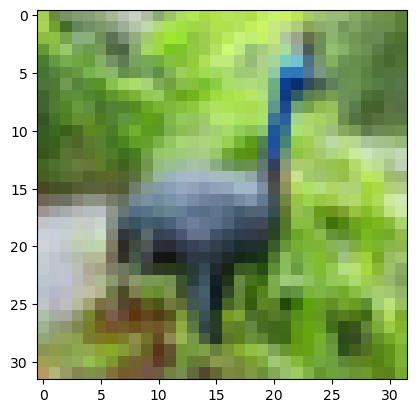

In [17]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin-1')
    return dict
batch_1 = unpickle("data_batch_1")

sample_image = batch_1['data'][6].reshape(3, 32, 32).transpose(1, 2, 0)
plt.imshow(sample_image)
plt.show()

d) This image is 32 x 32 = 1024 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. So, in a way, we have a dataset of 1024 3-dimensional data points. By applying Kmeans to this dataset, we are clustering for similar colors (so all the blues might be in the same cluster etc.). The centroid of each cluster will also be an RGB color. We can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K colors to recreate the image.

Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

For example, if the original image is the following:

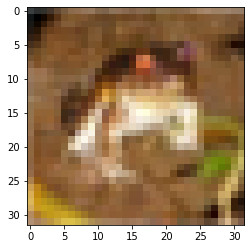

In [18]:
from IPython.display import Image
Image(filename="frog.png", width=300, height=300)

The transformation, using only 4 colors / centroids would look like:

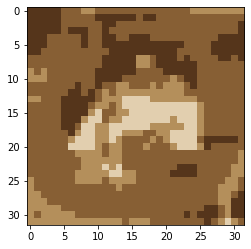

In [19]:
Image(filename="frog_4.png", width=300, height=300)

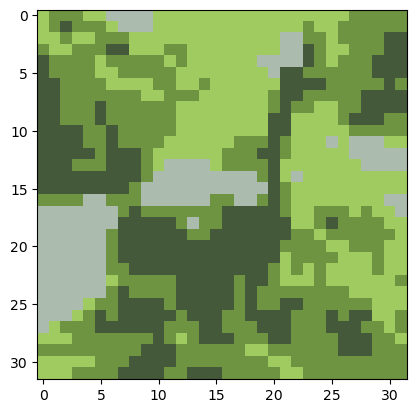

In [20]:
def color_segmentation(clusters):
    (h,w,c) = sample_image.shape
    sample_image_reshape = sample_image.reshape(h*w,c) #reshape 3D image 32X32X3 to 2D 1024x3
    kmeans_cluster = KMeans(n_clusters=clusters)
    cluster_labels = kmeans_cluster.fit_predict(sample_image_reshape) 
    rgb_cols = kmeans_cluster.cluster_centers_.round(0).astype(int) # round values for colors
    img_quant = np.reshape(rgb_cols[cluster_labels],(32,32,3)) # reshape vector back to image
    plt.imshow(img_quant)
    plt.show()

color_segmentation(4)


e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

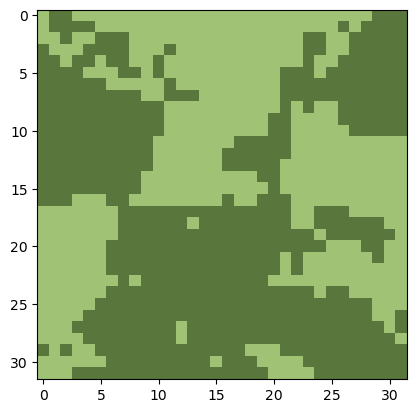

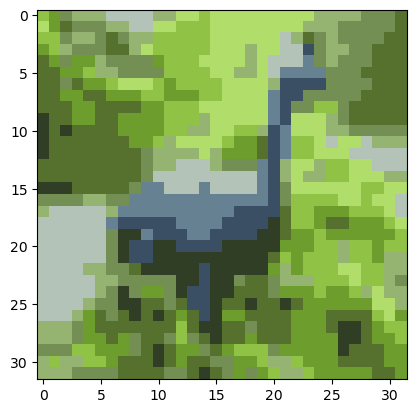

In [21]:
color_segmentation(2)
color_segmentation(10)